In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [32]:
import statsmodels.api as sm

In [33]:
from statsmodels.formula.api import ols

In [34]:
df=pd.read_csv('CleanedData.csv')

In [35]:
df.head()

,Unnamed: 0,UID,Current Stream,HigherStudyMarks,SecClassMarks,B.Tech CGPA,EnglishScore,QuntAbility,LogicalAbility,ProgrammingScore,DomaninKnowledge,AutomataScore,AutomataFixScore,EssayWritingScore,Backlog,Gender,PlacementStatus,OfferedSalary
0,0,17BCS3755,0,79.8,64.4,48.7,615.0,380.0,250.0,370.0,340.0,9.0,0.0,306.0,4.0,1,0,0.0
1,1,17BCS3756,0,93.1,88.6,78.0,615.0,640.0,660.0,625.0,580.0,52.0,0.0,648.0,0.0,1,1,4.5
2,2,17BCS3757,0,74.0,70.6,63.1,645.0,410.0,610.0,240.0,380.0,7.0,0.0,612.0,0.0,0,0,0.0
3,3,17BCS3758,0,95.0,80.4,81.3,805.0,710.0,680.0,670.0,700.0,79.0,0.0,495.0,0.0,1,1,6.5
4,4,17BCS3759,0,87.4,70.8,76.8,735.0,505.0,585.0,375.0,420.0,4.0,0.0,567.0,0.0,0,0,0.0


In [36]:
df.rename({'Current Stream':'SpecializationLevels'},axis=1,inplace=True)

In [37]:
df.drop(['Unnamed: 0','UID'],axis=1,inplace=True)

In [38]:
df.SpecializationLevels.value_counts()

0    164
3    117
1    101
2     83
4     50
Name: SpecializationLevels, dtype: int64

In [39]:
gr=df.groupby(df.SpecializationLevels)

gr0=gr.get_group(0)
g0=gr0['OfferedSalary']

gr1=gr.get_group(1)
g1=gr1['OfferedSalary']

gr2=gr.get_group(2)
g2=gr2['OfferedSalary']

gr3=gr.get_group(3)
g3=gr3['OfferedSalary']

gr4=gr.get_group(4)
g4=gr4['OfferedSalary']

[]

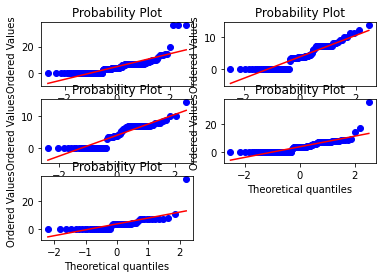

In [47]:
fig=plt.figure()
ax1=fig.add_subplot(3,2,1)
stats.probplot(g0,plot=plt)
ax2=fig.add_subplot(3,2,2)
stats.probplot(g1,plot=plt)
ax3=fig.add_subplot(3,2,3)
stats.probplot(g2,plot=plt)
ax4=fig.add_subplot(3,2,4)
stats.probplot(g3,plot=plt)
ax2=fig.add_subplot(3,2,5)
stats.probplot(g4,plot=plt)

#fig=plt.figure()
#ax=fig.add_subplot(111)
#stats.probplot(g3,plot=plt)

plt.plot()

In [11]:
k2, p = stats.normaltest(g0)
p

2.2788480315850686e-30

In [12]:
k2, p = stats.normaltest(g1)
p

0.05044400271558195

In [13]:
k2, p = stats.normaltest(g2)
p

0.08037090291661374

In [14]:
k2, p = stats.normaltest(g3)
p

3.437588498171929e-26

In [15]:
k2, p = stats.normaltest(g4)
p

1.861885918791926e-17

In [16]:
from scipy.stats import levene
stats,p=levene(df[df['SpecializationLevels']==0]['OfferedSalary'],df[df['SpecializationLevels']==1]['OfferedSalary'],df[df['SpecializationLevels']==2]['OfferedSalary'],df[df['SpecializationLevels']==3]['OfferedSalary'],df[df['SpecializationLevels']==4]['OfferedSalary'])
p           #The large p-value suggests that the populations do not have equal variances.

0.4595129005463522

In [16]:
#mod=ols('OfferedSalary~SpecializationLevels',data=df).fit()

In [17]:
#aov=sm.stats.anova_lm(mod,type=2)

In [20]:
from pingouin import kruskal

In [21]:
kruskal(data=df,dv='OfferedSalary',between='SpecializationLevels')#No significant difference found

,Source,ddof1,H,p-unc
Kruskal,SpecializationLevels,4,7.670774,0.10441


In [23]:
#from scipy.stats import kruskal as kr

In [24]:
#kr(g0,g1,g2,g3,g4)

KruskalResult(statistic=7.670774305111356, pvalue=0.10441040393607541)

In [26]:
#df=len(df['SpecializationLevels'].unique())-1

In [27]:
#df

4